In [318]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import reduce
import pickle
import warnings
warnings.filterwarnings("ignore")

In [319]:
#carregando as tableas

In [320]:
tab_calendario = pd.read_csv('dim_calendario.csv')

In [321]:
tab_calendario.dtypes 

fk_calendario    int64
ano              int64
dtype: object

In [322]:
tab_pais = pd.read_csv('dim_pais.csv')

In [323]:
tab_pais.dtypes

fk_pais_1       int64
nome_pais      object
pais_bloco     object
pais_regiao    object
pais_renda     object
dtype: object

In [324]:
#renomeando a coluna 

In [325]:
tab_pais = tab_pais.rename (columns = {'fk_pais_1':'fk_pais'})

In [326]:
tab_pais.dtypes

fk_pais         int64
nome_pais      object
pais_bloco     object
pais_regiao    object
pais_renda     object
dtype: object

In [327]:
tab_produto = pd.read_csv('dim_produto.csv')

In [328]:
tab_produto.dtypes

fk_produto       int64
nome_produto    object
tipo            object
dtype: object

In [329]:
tab_setor = pd.read_csv('dim_setor.csv')

In [330]:
tab_setor.dtypes

fk_setor       int64
nome_setor    object
dtype: object

In [331]:
tab_fato_energia = pd.read_csv('fato_energia.csv')

In [332]:
tab_fato_energia.dtypes

id_energia        int64
fk_pais           int64
fk_setor          int64
fk_produto        int64
fk_calendario     int64
valor            object
dtype: object

In [333]:
tab_fato_populacao = pd.read_csv('fato_populacao.csv')

In [334]:
tab_fato_populacao.dtypes

pais_bloco        object
fk_pais            int64
fk_calendario      int64
populacao        float64
id_populacao       int64
dtype: object

In [335]:
#unindo as tabelas

In [336]:
tab_energia = pd.merge(tab_fato_energia,tab_setor, on = 'fk_setor', how = 'inner')

In [337]:
print(tab_energia)

        id_energia  fk_pais  fk_setor  fk_produto  fk_calendario        valor  \
0                1        2         9           1              1  1368.251838   
1               13        2         9           2              1  620.7177142   
2               25        2         9           8              1            0   
3               37        2         9           6              1  75.06450081   
4               49        2         9           7              1            0   
...            ...      ...       ...         ...            ...          ...   
222151      222152       43         2           7             51            0   
222152      222153       43         2           9             51     33066.05   
222153      222154        1         2           4             51           ..   
222154      222155        1         2           7             51           ..   
222155      222156        1         2           9             51           ..   

                      nome_

In [338]:
#Removendo valores não numéricos

In [339]:
tab_energia = tab_energia[tab_energia['valor'] != '..']

In [340]:
tab_energia = pd.merge(tab_energia, tab_produto, on = 'fk_produto', how = 'inner')

In [341]:
print(tab_energia)

        id_energia  fk_pais  fk_setor  fk_produto  fk_calendario        valor  \
0                1        2         9           1              1  1368.251838   
1               97        3         9           1              1  43.48392895   
2              193        4         9           1              1  284.4996793   
3              289        6         9           1              1  396.0110403   
4              385        7         9           1              1  47.31181134   
...            ...      ...       ...         ...            ...          ...   
197880      222141       20         2           9             51     58684.12   
197881      222144       30         2           9             51     7745.183   
197882      222147       36         2           9             51     1444.633   
197883      222150       39         2           9             51    16832.723   
197884      222153       43         2           9             51     33066.05   

                      nome_

In [342]:
tab_energia.valor = pd.to_numeric(tab_energia.valor, errors = 'coerce')

In [343]:
tab_energia = pd.merge(tab_energia, tab_pais, on = 'fk_pais', how = 'inner')

In [344]:
print (tab_energia)

        id_energia  fk_pais  fk_setor  fk_produto  fk_calendario  \
0                1        2         9           1              1   
1             4357        2         9           1              2   
2             8713        2         9           1              3   
3            13069        2         9           1              4   
4            17425        2         9           1              5   
...            ...      ...       ...         ...            ...   
197880      204729       43         2           9             47   
197881      209085       43         2           9             48   
197882      213441       43         2           9             49   
197883      217797       43         2           9             50   
197884      222153       43         2           9             51   

               valor                nome_setor              nome_produto tipo  \
0        1368.251838           Production (PJ)  Coal, peat and oil shale  NRW   
1        1648.414248 

In [345]:
tab_energia = pd.merge(tab_energia, tab_calendario, on = 'fk_calendario', how = 'inner')

In [346]:
print(tab_energia)

        id_energia  fk_pais  fk_setor  fk_produto  fk_calendario  \
0                1        2         9           1              1   
1                2        2         5           1              1   
2                3        2         4           1              1   
3                4        2        11           1              1   
4                5        2         3           1              1   
...            ...      ...       ...         ...            ...   
196425      217570       43        10           5             50   
196426      217571       43         1           5             50   
196427      217572       43         8           5             50   
196428      217795       43         2           4             50   
196429      217797       43         2           9             50   

                valor                             nome_setor  \
0         1368.251838                        Production (PJ)   
1            0.000000                           Imports

In [347]:
tab_energia = pd.merge(tab_energia, tab_fato_populacao, on = 'fk_pais', how = 'inner')

In [348]:
print(tab_energia)

         id_energia  fk_pais  fk_setor  fk_produto  fk_calendario_x  \
0                 1        2         9           1                1   
1                 1        2         9           1                1   
2                 1        2         9           1                1   
3                 1        2         9           1                1   
4                 1        2         9           1                1   
...             ...      ...       ...         ...              ...   
9262870      217797       43         2           9               50   
9262871      217797       43         2           9               50   
9262872      217797       43         2           9               50   
9262873      217797       43         2           9               50   
9262874      217797       43         2           9               50   

                valor                nome_setor              nome_produto  \
0         1368.251838           Production (PJ)  Coal, peat and oil sh

# Machine Learning

In [349]:
# Importando as bibliotecas necessárias

In [350]:
import numpy as np

In [351]:
import matplotlib.pyplot as plt

In [352]:
from sklearn.linear_model import LinearRegression

In [353]:
import matplotlib.pyplot as plt

In [354]:
#Carregando os dados

In [355]:
tab_energia1.dtypes 

id_energia           int64
fk_pais              int64
fk_setor             int64
fk_produto           int64
fk_calendario_x      int64
valor               object
nome_setor          object
nome_produto        object
tipo                object
ano_x                int64
nome_pais_x         object
pais_bloco_x        object
pais_regiao_x       object
pais_renda_x        object
nome_pais_y         object
pais_bloco_y        object
pais_regiao_y       object
pais_renda_y        object
ano_y                int64
pais_bloco          object
fk_calendario_y      int64
populacao          float64
id_populacao         int64
dtype: object

In [356]:
tab_energiafinal = pd.read_csv('tab_energia1.csv')

In [367]:
print (tab_energiafinal.head())

   id_energia  fk_pais  fk_setor  fk_produto  fk_calendario_x        valor  \
0           1        2         9           1                1  1368.251838   
1           1        2         9           1                1  1368.251838   
2           1        2         9           1                1  1368.251838   
3           1        2         9           1                1  1368.251838   
4           1        2         9           1                1  1368.251838   

        nome_setor              nome_produto tipo  ano_x  ... pais_renda_x  \
0  Production (PJ)  Coal, peat and oil shale  NRW   1971  ...  High income   
1  Production (PJ)  Coal, peat and oil shale  NRW   1971  ...  High income   
2  Production (PJ)  Coal, peat and oil shale  NRW   1971  ...  High income   
3  Production (PJ)  Coal, peat and oil shale  NRW   1971  ...  High income   
4  Production (PJ)  Coal, peat and oil shale  NRW   1971  ...  High income   

  nome_pais_y pais_bloco_y        pais_regiao_y pais_renda_y a

In [379]:
tab_energiafinal.valor= pd.to_numeric(tab_energiafinal.valor , errors='coerce')

In [386]:
tab_energiafinal.dtypes

id_energia           int64
fk_pais              int64
fk_setor             int64
fk_produto           int64
fk_calendario_x      int64
valor              float64
nome_setor          object
nome_produto        object
tipo                object
ano_x                int64
nome_pais_x         object
pais_bloco_x        object
pais_regiao_x       object
pais_renda_x        object
nome_pais_y         object
pais_bloco_y        object
pais_regiao_y       object
pais_renda_y        object
ano_y                int64
pais_bloco          object
fk_calendario_y      int64
populacao          float64
id_populacao         int64
dtype: object

In [387]:
tab_energiafinal= tab_energiafinal[tab_energiafinal['valor'] > 0]

In [388]:
ano = tab_energiafinal['ano_x'].values.reshape(-1,1)

In [389]:
producao_energia_limpa = tab_energiafinal['valor'].values

In [390]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(ano, producao_energia_limpa, test_size=0.2, random_state=42)

In [392]:
modelo = LinearRegression()

In [393]:
modelo.fit(X_treinamento, y_treinamento)

LinearRegression()

In [394]:
anos_futuros = np.arange(2020, 2031).reshape(-1, 1)
previsao_energia_limpa = modelo.predict(anos_futuros)

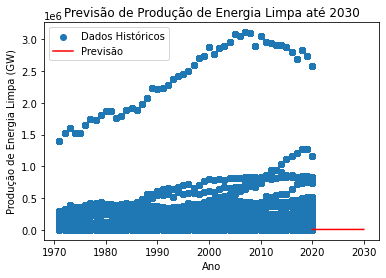

In [395]:
plt.scatter(ano, producao_energia_limpa, label='Dados Históricos')
plt.plot(anos_futuros, previsao_energia_limpa, label='Previsão', color='red')
plt.xlabel('Ano')
plt.ylabel('Produção de Energia Limpa (GW)')
plt.title('Previsão de Produção de Energia Limpa até 2030')
plt.legend()
plt.show()